# Using Cleaned Two Year Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(6,6)})
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [2]:
recid = pd.read_csv("data/compas-scores-two-years.csv")

In [3]:
#dropping unecessary columns
drop_columns = ['compas_screening_date', 'juv_fel_count',
                'juv_misd_count','c_case_number','vr_charge_degree',
                'vr_offense_date','vr_charge_desc','c_arrest_date',
                'r_case_number', 'vr_case_number','start',
                'juv_other_count','days_b_screening_arrest','c_days_from_compas',
                'first','last','name','dob','c_jail_in','c_jail_out','c_offense_date',
                'c_charge_degree','c_charge_desc','r_charge_degree','r_days_from_arrest',
                'r_offense_date','r_charge_desc','r_jail_in','r_jail_out','violent_recid',
                'score_text','screening_date','v_score_text','v_screening_date','in_custody',
                'out_custody','id','end','type_of_assessment','v_type_of_assessment','is_recid','is_violent_recid','event',
               'decile_score.1','priors_count.1', 'age_cat']
recid = recid.drop(drop_columns,axis=1)

In [4]:
recid.head()

,sex,age,race,decile_score,priors_count,v_decile_score,two_year_recid
0,Male,69,Other,1,0,1,0
1,Male,34,African-American,3,0,1,1
2,Male,24,African-American,4,4,3,1
3,Male,23,African-American,8,1,6,0
4,Male,43,Other,1,2,1,0


# Model for Caucasians

### Selecting columns for Caucasians and splitting, training, and testing data

In [5]:
#only looking at data for Caucasians
df_white = recid[recid.race == 'Caucasian']

In [6]:
#using only numerical columns and replacing its nans with 0s
df_nums = recid.select_dtypes(np.number).fillna(0)

In [7]:
#identifying a target variable and independent variables
target_variable = 'two_year_recid'
independent_variables = df_nums.drop(columns=target_variable).columns

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [9]:
#splitting the data into test and train
X = df_nums[independent_variables]
y = df_nums[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [10]:
model = LogisticRegression()

In [11]:
#fitting and prediction the model
model.fit(X_train, y_train)

predictions = model.predict(X_test)
true_classes = y_test
prediction_probabilities = model.predict_proba(X_test)

### Looking for false positive and false negative rates

In [12]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(true_classes, predictions)

array([[625, 198],
       [254, 366]])

In [13]:
#looking at the number of rows to calculate rates
X_test.count()

age               1443
decile_score      1443
priors_count      1443
v_decile_score    1443
dtype: int64

In [35]:
print('The false positive rate for Caucasians is: ' + str(198/1443))

The false positive rate for Caucasians is: 0.13721413721413722


In [36]:
print('The false negative rate for Caucasians is: ' + str(254/1443))

The false negative rate for Caucasians is: 0.176022176022176


### Evaluating model

In [16]:
#cross validating precision
from sklearn.model_selection import cross_val_score
cross_val_score(
    model, X, y, scoring = "precision", cv = 5
).mean()

0.671113045148461

In [17]:
#cross validating recall
cross_val_score(
    model, X, y, scoring = "recall", cv = 5
).mean()

0.5641332860687699

In [18]:
#cross validating accuracy
cross_val_score(
    model, X, y, scoring = "accuracy", cv = 5
).mean()

0.6789561352668149

In [19]:
#cross validating roc auc
cross_val_score(
    model, X, y, scoring = "roc_auc", cv = 5
).mean()

0.7306878331121813

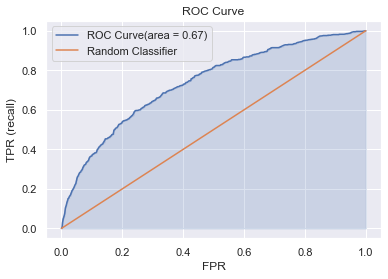

In [20]:
def roc_curve(true_classes, predictions, prediction_probabilities):
    fpr, tpr, _ = metrics.roc_curve(true_classes, prediction_probabilities[:,1])
    roc_auc = metrics.roc_auc_score(true_classes, predictions)

    sns.mpl.pyplot.fill_between(fpr, tpr, step='post', alpha=0.2,color='b')
    sns.lineplot(x=fpr, y=tpr, linestyle='--', label='ROC Curve(area = %0.2f)' % roc_auc)
    sns.lineplot(x=[0,1], y= [0,1], linestyle='--', label = 'Random Classifier')
    
    sns.mpl.pyplot.xlabel('FPR')
    sns.mpl.pyplot.ylabel('TPR (recall)')
    sns.mpl.pyplot.title('ROC Curve')

roc_curve(true_classes, predictions, prediction_probabilities)

# Model for African Americans

### Selecting columns for African-Americans and splitting, training, and testing data

In [21]:
#only looking at data for African Americans
df_af = recid[recid.race == 'African-American']

In [22]:
#using only numerical columns and replacing its nans with 0s
df_nums_af = df_af.select_dtypes(np.number).fillna(0)

In [23]:
#identifying a target variable and independent variables
target_variable = 'two_year_recid'
independent_variables = df_nums_af.drop(columns=target_variable).columns

In [24]:
#splitting the data into test and train
X_af = df_nums_af[independent_variables]
y_af = df_nums_af[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X_af, y_af,
                                                    test_size=0.2,
                                                    random_state=42)

In [25]:
#fitting and predicting model
model = LogisticRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)
true_classes = y_test
prediction_probabilities = model.predict_proba(X_test)

### Looking for false positive and false negative rates

In [26]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(true_classes, predictions)

array([[233, 138],
       [102, 267]])

In [27]:
X_test.count()

age               740
decile_score      740
priors_count      740
v_decile_score    740
dtype: int64

In [37]:
print('The false positive rate for African-Americans is: ' + str(138/740))

The false positive rate for African-Americans is: 0.1864864864864865


In [38]:
print('The false negative rate for African-Americans is: ' + str(102/740))

The false negative rate for African-Americans is: 0.13783783783783785


### Evaluating model

In [30]:
#cross validating precision
cross_val_score(
    model, X_af, y_af, scoring = "precision", cv = 5
).mean()

0.672996875369442

In [31]:
#cross validating recall
cross_val_score(
    model, X_af, y_af, scoring = "recall", cv = 5
).mean()

0.674365243818207

In [32]:
#cross validating accuracy
cross_val_score(
    model, X, y, scoring = "accuracy", cv = 5
).mean()

0.6789561352668149

In [33]:
#cross validating roc auc
cross_val_score(
    model, X, y, scoring = "roc_auc", cv = 5
).mean()

0.7306878331121813

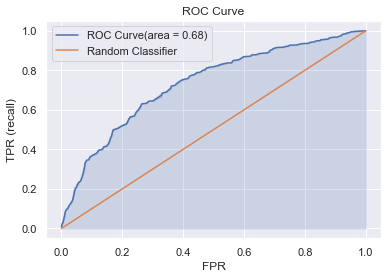

In [34]:
def roc_curve(true_classes, predictions, prediction_probabilities):
    fpr, tpr, _ = metrics.roc_curve(true_classes, prediction_probabilities[:,1])
    roc_auc = metrics.roc_auc_score(true_classes, predictions)

    sns.mpl.pyplot.fill_between(fpr, tpr, step='post', alpha=0.2,color='b')
    sns.lineplot(x=fpr, y=tpr, linestyle='--', label='ROC Curve(area = %0.2f)' % roc_auc)
    sns.lineplot(x=[0,1], y= [0,1], linestyle='--', label = 'Random Classifier')
    
    sns.mpl.pyplot.xlabel('FPR')
    sns.mpl.pyplot.ylabel('TPR (recall)')
    sns.mpl.pyplot.title('ROC Curve')

roc_curve(true_classes, predictions, prediction_probabilities)

## Key Takeaways from the Data

- African Americans have a larger percentage of false positives (__18.6% vs 13.8%__), meaning more of them were predicted to recommit but ended up not doing so, while Caucasians have a larger percentage of false negatives (__17.6% vs 13.7%__), meaning more of them were predicted to not recommit but ending up re-committing crimes.
***
- Caucasian Precision(__0.67__) vs African-American Precision(__0.67__): Because the Caucasian model had less false positives, there theoretically should be a higher precision. However, the fact that the Caucasian model had more true positives, precision balanced out between the 2 models. Take note that precision takes into account true positives. (TP / (TP + FP))
***
- Caucasian Recall(__0.56__) vs African-American Recall(__0.67__): Because the Caucasian model had more false negatives, there was a lower recall. (TP / (TP + FN))